In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import lightgbm as gbm
from sklearn.metrics import roc_auc_score
import matplotlib.pylab as plt
import pickle


In [14]:
df = pd.read_csv("../data/train_fft_final.csv")
df.head()

,Unnamed: 0,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,...,rel_humidity119,wind_dir119,windspeed119,atmospherepressure119,temp120,precip120,rel_humidity120,wind_dir120,windspeed120,atmospherepressure120
0,0,ID_train_0,C,45.126304,27.208333,18.505041,22.308697,2.642953,6.985200,22.142764,...,0.881500,278.798377,0.673333,87.750833,19.583333,0.000,0.874583,276.364023,0.855000,87.768333
1,1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
2,2,ID_train_10,A,32.661304,31.841667,18.458333,24.118185,3.761289,14.147294,23.308333,...,0.459583,209.603600,1.481667,88.475833,30.091667,0.000,0.437917,250.105258,1.746667,88.415833
3,3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,...,0.766417,333.842514,1.367500,88.490833,24.641667,0.000,0.719667,329.145083,1.852500,88.465833
4,4,ID_train_1000,A,177.418750,28.750000,17.525000,21.948519,3.097891,9.596932,20.843690,...,0.795316,78.186737,0.730271,88.442120,20.843690,0.000,0.874770,0.000000,0.160491,88.539125


In [15]:
df.describe()

,Unnamed: 0,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,p1_temp,...,rel_humidity119,wind_dir119,windspeed119,atmospherepressure119,temp120,precip120,rel_humidity120,wind_dir120,windspeed120,atmospherepressure120
count,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,...,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000,15539.000000
mean,7769.000000,58.242429,29.563589,17.545740,22.778939,3.225791,10.894309,22.095339,12.017849,17.812175,...,0.794603,197.225792,1.069867,89.039689,22.830613,0.153948,0.794071,197.339242,1.070968,89.038222
std,4485.867252,42.373700,2.138699,1.074130,1.310015,0.699009,4.620378,1.395059,2.359813,1.075494,...,0.148755,107.556009,0.833102,1.088594,3.556467,1.346191,0.149510,108.145494,0.834098,1.088972
min,0.000000,1.452619,19.733333,13.783333,18.579461,0.189463,0.035896,18.548734,2.133333,14.140000,...,0.172417,0.000000,0.058207,87.281667,14.650000,0.000000,0.172417,0.000000,0.004082,87.281667
25%,3884.500000,33.482625,27.891667,16.841667,21.716290,2.728321,7.443736,20.908333,10.291667,17.076667,...,0.693059,109.863758,0.535000,88.300000,19.950000,0.000000,0.691667,109.312690,0.529167,88.296667
50%,7769.000000,46.504048,29.483333,17.516667,22.764920,3.176182,10.088132,22.058333,11.650000,17.743333,...,0.824333,194.916872,0.845000,88.515833,22.175000,0.000000,0.823333,195.170090,0.845833,88.514167
75%,11653.500000,68.569062,30.950000,18.283333,23.706339,3.719597,13.835405,23.158333,13.681061,18.565000,...,0.915000,299.606342,1.348333,90.431667,25.416667,0.000000,0.915436,300.489768,1.357500,90.430833
max,15538.000000,475.820000,36.533333,20.408333,27.549449,5.704088,32.536622,26.625000,18.933333,20.921667,...,1.000000,360.000000,12.329167,91.130833,36.533333,38.762000,1.000000,360.000000,12.329167,91.115833


In [20]:
df2 = df.copy()

X=df2.drop(['target','Unnamed: 0','ID','location'],axis=1)
y=df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,max_depth=6)
model.fit(X_train, y_train)


print(model.score(X_test, y_test))
print(model.predict(X_test))

0.46828740654021983
[79.68558346 56.15779736 79.20371543 ... 63.0049943  51.98759704
 55.29982898]


In [28]:
y_pred=model.predict(X_test)

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 120
Average maximum depth 6


In [36]:
np.sum((np.array(y_pred )-np.array(y_test))**2)**0.5/len(y_test)

0.45934598585944314

In [35]:
print(np.array(y_test))
print(np.array(y_pred))
y_train_pred=model.predict(X_train)
np.sum((np.array(y_train_pred )-np.array(y_train))**2)**0.5

[37.692      64.73638298 46.25021739 ... 51.89765957 26.70681818
 67.26516129]
[79.68558346 56.15779736 79.20371543 ... 63.0049943  51.98759704
 55.29982898]


2915.03602938769

In [9]:
df2.isnull().sum()

target                     0
p1_temp                    0
p5_temp                    0
p10_temp                   0
p20_temp                   0
                        ... 
newprecip120               0
newrel_humidity120         0
newwind_dir120           241
windspeed120             241
atmospherepressure120      0
Length: 834, dtype: int64

In [52]:
df_means = pd.read_csv("../data/train_means.csv")
df.head()

,Unnamed: 0,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,...,rel_humidity119,wind_dir119,windspeed119,atmospherepressure119,temp120,precip120,rel_humidity120,wind_dir120,windspeed120,atmospherepressure120
0,0,ID_train_0,C,45.126304,27.208333,18.505041,22.308697,2.642953,6.985200,22.142764,...,0.881500,278.798377,0.673333,87.750833,19.583333,0.000,0.874583,276.364023,0.855000,87.768333
1,1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
2,2,ID_train_10,A,32.661304,31.841667,18.458333,24.118185,3.761289,14.147294,23.308333,...,0.459583,209.603600,1.481667,88.475833,30.091667,0.000,0.437917,250.105258,1.746667,88.415833
3,3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,...,0.766417,333.842514,1.367500,88.490833,24.641667,0.000,0.719667,329.145083,1.852500,88.465833
4,4,ID_train_1000,A,177.418750,28.750000,17.525000,21.948519,3.097891,9.596932,20.843690,...,0.795316,78.186737,0.730271,88.442120,20.843690,0.000,0.874770,0.000000,0.160491,88.539125


In [53]:
df_means2 = df_means.copy()

X=df_means2.drop(['target','Unnamed: 0','ID','location'],axis=1)
y=df_means2['target']

X_train_means, X_test_means, y_train_means, y_test_means = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
model_means = RandomForestRegressor(n_jobs=-1,max_depth=6)
model_means.fit(X_train_means, y_train_means)


print(model.score(X_test_means, y_test_means))
print(model.predict(X_test_means))

0.4368608405807066
[79.68558346 56.15779736 86.52632827 ... 63.0049943  51.98759704
 55.29982898]


In [121]:
def result_to_category(liste):
    
    list_category = []
    
    for i in liste:
        if  i >= 0 and i <= 13:
            i = "1"
            list_category.append(i)
        elif i > 13 and i <= 36:
            i = "2"
            list_category.append(i)
        elif i > 36 and i <= 56:
            i = "3"
            list_category.append(i)
        elif i > 56 and i <= 151:
            i = "4"
            list_category.append(i)
        elif i > 151 and i <= 250:
            i = "5"
            list_category.append(i)
        elif i > 250 and i <= 500:
            i = "6"
            list_category.append(i)
            
    return list_category
            
        
            
#result_to_category(model.predict(X_test_means))
    

In [119]:
model.predict(X_test_means)

array([79.68558346, 56.15779736, 86.52632827, ..., 63.0049943 ,
       51.98759704, 55.29982898])

In [122]:
df_test = pd.DataFrame(result_to_category(y_test_array))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4662 non-null   object
dtypes: object(1)
memory usage: 36.5+ KB


In [123]:
df_test2 = pd.DataFrame(result_to_category(model.predict(X_test_means)))
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4662 non-null   object
dtypes: object(1)
memory usage: 36.5+ KB


In [124]:
from sklearn.metrics import confusion_matrix

y_test_array=y_test.values

y_test_category=result_to_category(y_test_array)
y_pred_category=result_to_category(model.predict(X_test_means))

confusion_matrix(y_test_category, y_pred_category)

array([[  0,  46,  44,  10,   0,   0],
       [  0, 398, 732, 140,   0,   0],
       [  0, 134, 943, 496,   0,   0],
       [  0,  26, 568, 927,  13,   0],
       [  0,   0,  17, 100,  32,   0],
       [  0,   0,   1,  13,  22,   0]])

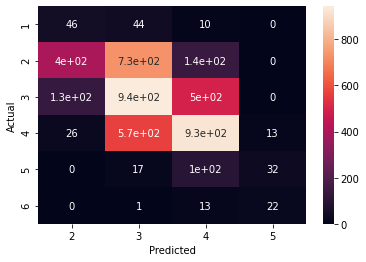

In [125]:
data = {'y_Actual':   y_test_category,
        'y_Predicted': y_pred_category
        }

df_matrix = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_matrix['y_Actual'], df_matrix['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [126]:
np.unique(y_pred_category)

array(['2', '3', '4', '5'], dtype='<U1')

In [117]:
from sklearn.metrics import classification_report

df_matrix = classification_report(y_test_category,y_pred_category)
print('Classification report : \n',df_matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       100
           2       0.66      0.31      0.42      1270
           3       0.41      0.60      0.49      1573
           4       0.55      0.60      0.58      1534
           5       0.48      0.21      0.30       149
           6       0.00      0.00      0.00        36

    accuracy                           0.49      4662
   macro avg       0.35      0.29      0.30      4662
weighted avg       0.51      0.49      0.48      4662



/Users/timorsharafiq-dost/Desktop/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timorsharafiq-dost/Desktop/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timorsharafiq-dost/Desktop/neuefische/Project2/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [50]:
df:m.isnull().sum()

Unnamed: 0                 0
ID                         0
location                   0
target                     0
max_temp                   0
                        ... 
newprecip120               0
newrel_humidity120         0
newwind_dir120           241
windspeed120             241
atmospherepressure120      0
Length: 844, dtype: int64

In [43]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [44]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [45]:
loaded_model.predict(X_test)

array([79.68558346, 56.15779736, 79.20371543, ..., 63.0049943 ,
       51.98759704, 55.29982898])